# Vectors

(adapted from  CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh)


Chapter 4 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Add and subtract vectors
- Understand dot and cross products of vectors

## Scalars vs. Vectors

"**Scalars**" are just numbers - they have a magnitude, a size. The mass of a molecule would be an example, e.g., 120 amu.

<div class="alert alert-block alert-success">

**Vectors** have both a magnitude and a direction:
- velocity $\mathbf{v}$
- acceleration $\mathbf{a}$
- force $\mathbf{F}$
- electric field $\mathbf{E}$

</div>
    
Even the position of atoms are vectors.

Often, we use an arrow indicator: $\vec{F}$ or bold symbols $\mathbf{F}$ to indicate a vector is a bit different from other variables.

While we'll use 2D or 3D vectors in chemistry the most, vectors aren't limited to that.

Moreover, we usually work in 3D Cartesian coordinates:

$$
\mathbf{w}=w_{x} \hat{\mathbf{x}}+w_{y} \hat{\mathbf{y}}+w_{z} \hat{\mathbf{z}}
$$

<img src="./images/vector-3d.png" width="300" />

<div class="alert alert-block alert-info">
    <b>Tip:</b>
    
Much like earlier, we can transform this into spherical polar coordinates, for example. (Consider if we want to express the electric field between the nucleus of an atom and the electrons.)

$$
\begin{aligned} r &=\sqrt{w_{x}^{2}+w_{y}^{2}+w_{z}^{2}} \\ 
\theta &=\arccos \left(\frac{w_{z}}{r}\right)=\cos ^{-1}\left(\frac{w_{z}}{r}\right) \\
\varphi &=\tan ^{-1}\left(\frac{w_{y}}{w_{x}}\right) \end{aligned}
$$

</div>

In [1]:
# here's an example of a water molecule
#   (don't worry about this code)
#   (you can safely ignore it  )
import py3Dmol
# a string with the water atomic coordinates
xyz = '''3
 water
O -2.843   0.469  0.000
H -1.873   0.469  0.000
H -3.166  -0.308 -0.482
'''
# let's see it
xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(xyz,'xyz')
xyzview.setStyle({'stick':{}})
xyzview.zoomTo()
xyzview.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [2]:
import numpy as np

# atoms in that water molecule
o =  np.array([-2.843,  0.469,  0.000])
h1 = np.array([-1.873,  0.469,  0.000])
h2 = np.array([-3.166, -0.308, -0.482])

## Adding and Subtracting Vectors

Adding and subtracting vectors is pretty easy - you add the individual components. (It's a bit like adding or subtracting complex numbers.)

$$\mathbf{v_1} = (a, b, c)$$
$$\mathbf{v_2} = (x, y, z)$$
$$\mathbf{v_1} + \mathbf{v_2} = (a+x, b+y, c+z)$$

In [3]:
# what's the bond length of o-h?

o_h1 = o - h1 # subtract the two positions to get the vector along the bond
print(o_h1)

# there are faster ways to do this, but I'm being explicit in what's happening
# magnitude = sqrt(x**2 + y**2 + z**2)
# since arrays start from x=0,        y=1,        z=2
print('magnitude: ', np.sqrt(o_h1[0]**2 + o_h1[1]**2 + o_h1[2]**2), "Å")

[-0.97  0.    0.  ]
magnitude:  0.97 Å


In [4]:
# what's the distance between the two hydrogens?
h_h = h2 - h1
print(h_h)

# this numpy method gives us the "norm" or magnitude of any vector
distance = np.linalg.norm(h_h)
print('h-h distance: ', distance)
# oops, let's make sure we track significant figures!
print('rounded: ', round(distance, 3), "Å")

[-1.293 -0.777 -0.482]
h-h distance:  1.583635690428831
rounded:  1.584 Å


In [5]:
# we can also average the positions by adding them and dividing by 3
center = (o + h1 + h2)/3
total = (o+h1+h2)
print(total)

# we can set the precision of the display
np.set_printoptions(precision=3)

print(center)

[-7.882  0.63  -0.482]
[-2.627  0.21  -0.161]


## Scalar product

You might have missed it, but we actually multiplied a vector by a scalar number above, when taking an average:

$$ centroid = \frac{\sum \mathbf{v_i}}{n} $$

Not surprisingly, multiplying a vector by a number, you just multipy the components:

$$\mathbf{v_2} = (x, y, z)$$
$$\pi \mathbf{v_2} = (\pi x, \pi y, \pi z)$$

Dividing by a number is simply multiplying by $1 / n$ - it's still a scalar.

## Vector - Vector Multiplication

There are two ways to multiply one vector and another vector:
- the **scalar** dot product (i.e. $v_1 \bullet v_2 = c$ where $c$ is a scalar number)
- the **vector** cross product (i.e. $v_1 \times v_2 = v_3$ where $v_3$ is a new vector)

Both are useful for different tasks.

### Dot product

$$\mathbf{v} \bullet \mathbf{w} = v_x w_x + v_y w_y + v_z w_z$$

Note that this is simply the product of the individual components of $\mathbf{v}$ and $\mathbf{w}$

#### Geometric interpretation

The dot product can also be written as:

$$
\mathbf{v} \cdot \mathbf{w}=|\mathbf{v}||\mathbf{w}| \cos \theta
$$

It's pretty easy to see that if $\mathbf{v} = \mathbf{w}$ then 

$$\mathbf{v} \cdot \mathbf{v} = |\mathbf{v}^2|$$

Also, if $\theta = 90\deg$ then the two vectors are perpendicular, $\cos \theta = 0$ and:

$$
\mathbf{v} \cdot \mathbf{w}=|\mathbf{v}||\mathbf{w}| \cos 0 = 0
$$

<img src="./images/vector-dotproduct.png" width="296" />

<div class="alert alert-block alert-success">
    
The dot product $\mathbf{v} \cdot \mathbf{w}$ can be considered the projection of $\mathbf{v}$ onto $\mathbf{w}$ or equivalently the projection of $\mathbf{w}$ onto $\mathbf{v}$.
    
</div>

In [6]:
# first, let's check the different ways to calculate a dot product
o_h1 = o - h1
o_h2 = o - h2

dot = o_h1[0] * o_h2[0] + o_h1[1] * o_h2[1] + o_h1[2] * o_h2[2]
print(dot)

# there's a numpy method np.dot(a, b)
print(np.dot(o_h1, o_h2))

# let's compare to the |v| * |w| * cos(theta) form

# np.radians converts a number in degrees to radians
cos_theta = np.cos(np.radians(109.46))
print(np.linalg.norm(o_h1) * np.linalg.norm(o_h2) * cos_theta)

-0.3133099999999999
-0.3133099999999999
-0.3133733050623246


Okay, there are some small numerical differences - I intentionally did not round the results to remind ourselves that numerical errors can creep into programs.

So what?

#### Dot Product Example

Let's imagine an electric field **E** applied to a polar molecule. In my group's research, we apply electric fields to molecules at a surface. So we know that the electric field is directly 'up' from the metal surface, but the molecule is often at an angle.

<img src="./images/vector-dipole.png" width="310" />

The potential energy of interaction (a scalar) will be $V = \mathbf{E}\cdot\mathbf{\mu}$ if the dipole moment of the molecule is $\mu$.

That means we can write out the energy V as a function:

$$
V(\theta)=-\mathbf{E} \cdot \boldsymbol{\mu}=-|\mathbf{E}||\boldsymbol{\mu}| \cos \theta
$$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# insert any graphs into our notebooks directly
# set up formatting too
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


findfont: Font family ['[Arial', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif]'] not found. Falling back to DejaVu Sans.


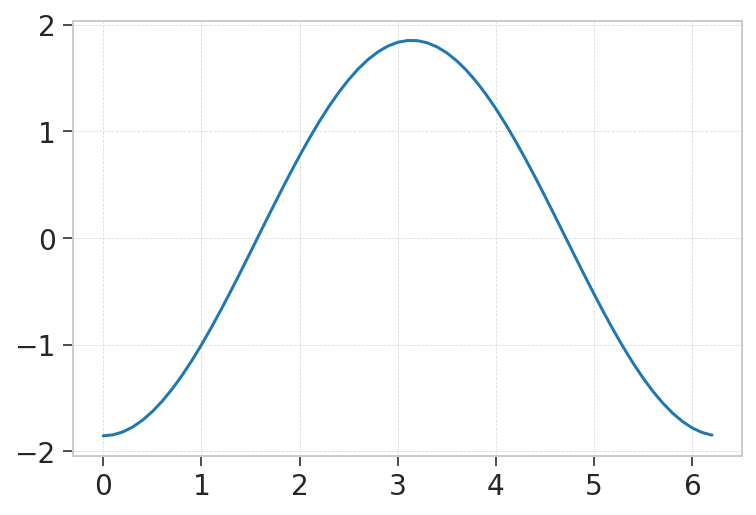

In [11]:
E = 1.0 # field magnitude
mu = 1.8546 # dipole moment of water molecule in Debye

x = np.arange(0, 2*np.pi, 0.1)   # start, stop, resolution
y = -E * mu * np.cos(x)

plt.plot(x,y)
plt.show()

Remember that lower (e.g., negative) energies are more stable. So the potential energy of interaction between the molecule and the electric field at the surface is more stable when $\theta = 0$ or $2\pi$ (i.e., the dipole moment of the molecule is parallel to the field) and less stable when $\theta = \pi$ (i.e., the dipole moment is anti-parallel / opposite to the field.

We'll come back to this example later - this potential energy can be used to calculate a **force** on the molecule. 

### Cross product

Beyond the dot-product, which results in a scalar, we can also multiply two vectors to yield a new vector:

$$
\mathbf{v} \times \mathbf{w}=\left(v_{y} w_{z}-v_{z} w_{y}\right) \hat{\mathbf{i}}+\left(v_{z} w_{x}-v_{x} w_{z}\right) \hat{\mathbf{j}}+\left(v_{x} w_{y}-v_{y} w_{x}\right) \hat{\mathbf{k}}
$$

#### Geometric interpretation

<img src='./images/vector-crossproduct.png' width="305" />

That is, the new vector is perpendicular to the plane created by $\mathbf{v}$ and $\mathbf{w}$, with a magnitude:

$$
|\mathbf{v} \times \mathbf{w}|=|\mathbf{v}||\mathbf{w}||\sin \theta|
$$

(i.e., the size of the new cross-product vector is equal to the area of the shaded area in the figure above)

#### Direction

You can determine the direction of the cross-product vector through the right hand rule:

1. point the index finger of your right hand along vector **v**
2. point the middle finger of your right hand along vector **w**
3. your thumb points in the direction of the cross product **v** $\rightarrow$ **w**

<div class="alert alert-block alert-danger">

**Warning:** Because the order matters, the cross product is ***anti-commutative.***
    
That is, switching the order of the two vectors results in two different directions!
    
$$
\mathbf{v} \times \mathbf{w} = -\mathbf{w} \times \mathbf{v}
$$

</div>


In [9]:
print(np.cross(o_h1, o_h2))
print(np.cross(o_h2, o_h1))

[ 0.     0.468 -0.754]
[ 0.    -0.468  0.754]


#### Magnitude of the Cross Product

We mentioned that the cross-product vector has magnitude equal to the area formed by **v** and **w**.

When is the area the largest?

Let's imagine that the two vectors have length one (i.e. *unit vectors*)

$$
|\mathbf{v} \times \mathbf{w}|=|\mathbf{v}||\mathbf{w}||\sin \theta|
$$

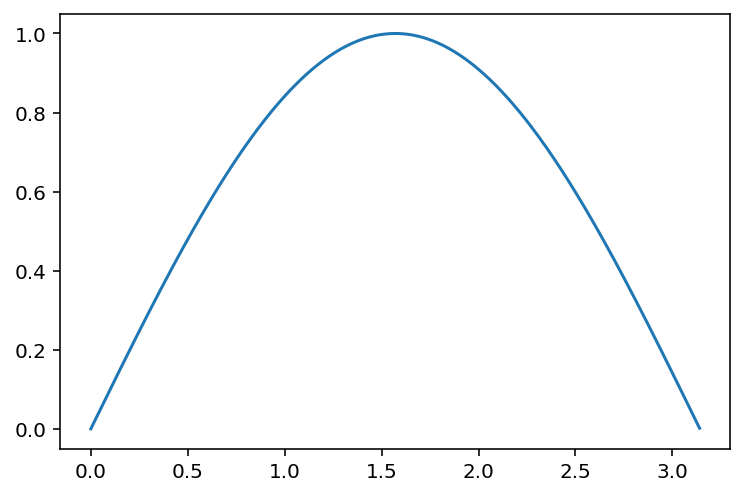

In [10]:
theta = np.arange(0, np.pi, 0.01)   # start, stop, resolution
area = 1.0 * 1.0 * np.sin(theta) # we could use any magnitudes for the vectors here

plt.plot(theta, area)
plt.show()

Okay, so when the vectors are parallel or anti-parallel $\theta = 0, \pi$ the area is zero - it's a line, not a shape.

Otherwise, the area is the maximum at $\theta = \pi / 2$ when the two vectors are perpendicular.

-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>